In [40]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

X = np.array([
    [4,4,-1],
    [6,2,-1],
    [-2, 0, -1],
    [-2, 4, -1],
    [0, 0, -1],

])

y = np.array([-1,-1,1,1, 1])

def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0])) #Initialize the weight vector for the perceptron with zeros
    eta = 1 #Set the learning rate to 1
    epochs = 20 #Set the number of epochs

    for t in range(epochs): #Iterate n times over the whole data set
        for i, x in enumerate(X): #Iterate over each sample in the data set
            if (np.dot(X[i], w)*Y[i]) <= 0: # Misclassification condition
                w = w + eta*X[i]*Y[i] #Update rule for the weights

    return w


w = perceptron_sgd(X,y)
print(w)

[-6.  0. -1.]


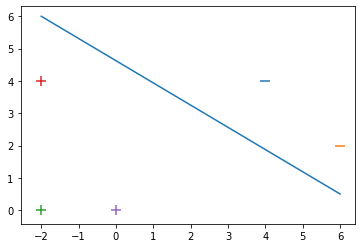

In [41]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

In [42]:
def perceptron_sgd_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

[-6.  0. -1.]


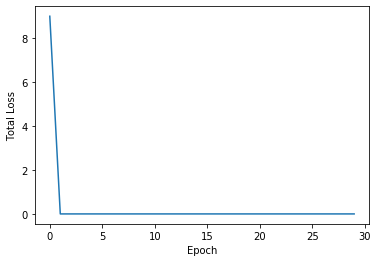

In [43]:
print(perceptron_sgd_plot(X,y))


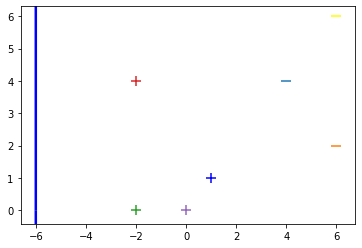

In [44]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(6,6, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(1,1, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')